In [1]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
dados = pd.read_csv("equipe_sample__Boa_Vista_original.csv", sep=';')

In [3]:
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190005436478,2019,1400100,Boa Vista,14,RR,21,Maculino,Solteiro(a),Preta,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, um",Não,"Sim, um",Sim
1,190003607381,2019,1400100,Boa Vista,14,RR,18,Feminino,Solteiro(a),Branca,...,"Sim, um",Não,Não,"Sim, três",Sim,Não,"Sim, quatro ou mais",Sim,"Sim, três",Sim
2,190005581420,2019,2502151,Boa Vista,25,PB,21,Feminino,Solteiro(a),Parda,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, um",Não,Não,Não
3,190003937011,2019,1400100,Boa Vista,14,RR,19,Feminino,Solteiro(a),Parda,...,"Sim, um",Não,Não,"Sim, um",Não,Não,"Sim, dois",Não,"Sim, um",Sim
4,190005058621,2019,2502151,Boa Vista,25,PB,25,Feminino,Solteiro(a),Parda,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, dois",Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190001037480,2019,1400100,Boa Vista,14,RR,17,Feminino,Solteiro(a),Branca,...,Não,Não,Não,"Sim, um",Sim,Não,"Sim, dois",Não,"Sim, dois",Sim
996,190003070387,2019,1400100,Boa Vista,14,RR,24,Feminino,Solteiro(a),Branca,...,"Sim, um",Não,Não,"Sim, dois",Sim,Sim,"Sim, dois",Sim,"Sim, um",Sim
997,190004950219,2019,1400100,Boa Vista,14,RR,18,Feminino,Solteiro(a),Parda,...,"Sim, um",Não,Não,"Sim, um",Não,Não,"Sim, três",Não,Não,Sim
998,190003933767,2019,1400100,Boa Vista,14,RR,19,Maculino,Solteiro(a),Parda,...,Não,Não,Não,"Sim, dois",Não,Sim,"Sim, dois",Sim,"Sim, um",Sim


In [4]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.000000e+03,1000.0,1.000000e+03,1000.000000,1000.000000,9.740000e+02,974.000000,2.700000e+02,2.700000e+02,270.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.900032e+11,2019.0,1.462917e+06,14.627000,20.593000,1.696367e+06,16.939425,1.457431e+07,1.453205e+06,14.529630,1.479860e+06,14.795000,134.980000,135.400000,130.120000,136.340000,107.400000,644.240000,4.069000
std,1.510458e+06,0.0,2.556302e+05,2.551545,5.166822,7.210870e+05,7.168607,2.369285e+06,2.365582e+05,2.359244,3.345376e+05,3.335581,24.556111,36.345027,35.333186,31.508684,58.739172,158.467455,1.496823
min,1.900010e+11,2019.0,1.400100e+06,14.000000,14.000000,1.100015e+06,11.000000,1.400047e+07,1.400100e+06,14.000000,1.302603e+06,13.000000,40.000000,40.000000,40.000000,0.000000,0.000000,120.000000,1.000000
25%,1.900020e+11,2019.0,1.400100e+06,14.000000,18.000000,1.400100e+06,14.000000,1.400079e+07,1.400100e+06,14.000000,1.400100e+06,14.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,3.000000
50%,1.900032e+11,2019.0,1.400100e+06,14.000000,19.000000,1.400100e+06,14.000000,1.400164e+07,1.400100e+06,14.000000,1.400100e+06,14.000000,140.000000,120.000000,120.000000,120.000000,120.000000,640.000000,4.000000
75%,1.900044e+11,2019.0,1.400100e+06,14.000000,21.000000,1.400209e+06,14.000000,1.400717e+07,1.400100e+06,14.000000,1.400100e+06,14.000000,160.000000,160.000000,160.000000,160.000000,160.000000,760.000000,5.000000
max,1.900061e+11,2019.0,2.502151e+06,25.000000,62.000000,5.300108e+06,53.000000,2.513741e+07,2.512002e+06,25.000000,5.208707e+06,52.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,11.000000


In [5]:
Counter(dados['TP_ESTADO_CIVIL'])

Counter({'Solteiro(a)': 903,
         'Divorciado(a)/Desquitado(a)/Separado(a)': 13,
         'Não informado': 43,
         'Casado(a)/Mora com um(a) companheiro(a)': 40,
         'Viúvo(a)': 1})

In [6]:
Counter(dados['IN_SALA_ACOMPANHANTE'])

Counter({'Não': 1000})

In [7]:
Counter(dados['IN_SALA_ESPECIAL'])

Counter({'Não': 1000})

In [8]:
for col in dados.columns:
    if len(dados[col].unique()) == 1:
        dados.drop(col,inplace=True,axis=1)

In [9]:
dados

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190005436478,1400100,14,RR,21,Maculino,Solteiro(a),Preta,Brasileiro(a),1501402.0,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, um",Não,"Sim, um",Sim
1,190003607381,1400100,14,RR,18,Feminino,Solteiro(a),Branca,Brasileiro(a),1400100.0,...,"Sim, um",Não,Não,"Sim, três",Sim,Não,"Sim, quatro ou mais",Sim,"Sim, três",Sim
2,190005581420,2502151,25,PB,21,Feminino,Solteiro(a),Parda,Brasileiro(a),2504009.0,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, um",Não,Não,Não
3,190003937011,1400100,14,RR,19,Feminino,Solteiro(a),Parda,Brasileiro(a),1400100.0,...,"Sim, um",Não,Não,"Sim, um",Não,Não,"Sim, dois",Não,"Sim, um",Sim
4,190005058621,2502151,25,PB,25,Feminino,Solteiro(a),Parda,Brasileiro(a),2504009.0,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, dois",Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190001037480,1400100,14,RR,17,Feminino,Solteiro(a),Branca,Brasileiro(a),1400100.0,...,Não,Não,Não,"Sim, um",Sim,Não,"Sim, dois",Não,"Sim, dois",Sim
996,190003070387,1400100,14,RR,24,Feminino,Solteiro(a),Branca,Brasileiro(a),1400100.0,...,"Sim, um",Não,Não,"Sim, dois",Sim,Sim,"Sim, dois",Sim,"Sim, um",Sim
997,190004950219,1400100,14,RR,18,Feminino,Solteiro(a),Parda,Brasileiro(a),2704302.0,...,"Sim, um",Não,Não,"Sim, um",Não,Não,"Sim, três",Não,Não,Sim
998,190003933767,1400100,14,RR,19,Maculino,Solteiro(a),Parda,Brasileiro(a),1400100.0,...,Não,Não,Não,"Sim, dois",Não,Sim,"Sim, dois",Sim,"Sim, um",Sim


In [10]:
del dados['NU_INSCRICAO']

In [11]:
dados

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1400100,14,RR,21,Maculino,Solteiro(a),Preta,Brasileiro(a),1501402.0,Belém,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, um",Não,"Sim, um",Sim
1,1400100,14,RR,18,Feminino,Solteiro(a),Branca,Brasileiro(a),1400100.0,Boa Vista,...,"Sim, um",Não,Não,"Sim, três",Sim,Não,"Sim, quatro ou mais",Sim,"Sim, três",Sim
2,2502151,25,PB,21,Feminino,Solteiro(a),Parda,Brasileiro(a),2504009.0,Campina Grande,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, um",Não,Não,Não
3,1400100,14,RR,19,Feminino,Solteiro(a),Parda,Brasileiro(a),1400100.0,Boa Vista,...,"Sim, um",Não,Não,"Sim, um",Não,Não,"Sim, dois",Não,"Sim, um",Sim
4,2502151,25,PB,25,Feminino,Solteiro(a),Parda,Brasileiro(a),2504009.0,Campina Grande,...,Não,Não,Não,"Sim, um",Não,Não,"Sim, dois",Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1400100,14,RR,17,Feminino,Solteiro(a),Branca,Brasileiro(a),1400100.0,Boa Vista,...,Não,Não,Não,"Sim, um",Sim,Não,"Sim, dois",Não,"Sim, dois",Sim
996,1400100,14,RR,24,Feminino,Solteiro(a),Branca,Brasileiro(a),1400100.0,Boa Vista,...,"Sim, um",Não,Não,"Sim, dois",Sim,Sim,"Sim, dois",Sim,"Sim, um",Sim
997,1400100,14,RR,18,Feminino,Solteiro(a),Parda,Brasileiro(a),2704302.0,Maceió,...,"Sim, um",Não,Não,"Sim, um",Não,Não,"Sim, três",Não,Não,Sim
998,1400100,14,RR,19,Maculino,Solteiro(a),Parda,Brasileiro(a),1400100.0,Boa Vista,...,Não,Não,Não,"Sim, dois",Não,Sim,"Sim, dois",Sim,"Sim, um",Sim


<AxesSubplot:>

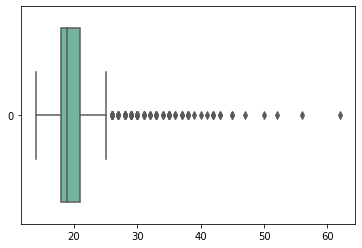

In [14]:
sns.boxplot(data=dados['NU_IDADE'], orient="h", palette="Set2")

In [16]:
Counter(dados['CO_MUNICIPIO_RESIDENCIA'])

Counter({1400100: 943, 2502151: 57})

Counter({True: 730, False: 270})